In [5]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [6]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [7]:
filename = '../csv_detection_info/18_3, UAP.csv'
filename_clean = '../csv_detection_info_clean/18_3, UAP.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/18/3, UAP'

In [8]:
detection_df = pd.read_csv(filename)

In [9]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.2.172.21.32.40.2018.4.10.14.18....,878,1129,1711,1968,0.992498,18,3,"3, UAP"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.2.172.21.32.40.2018.4.10.14.23....,606,842,1553,1794,0.871968,18,3,"3, UAP"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.2.172.21.32.40.2018.4.10.14.27....,504,757,1624,1876,0.904037,18,3,"3, UAP"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.2.192.168.1.90.2018.6.13.17.18....,1250,1427,1195,1372,0.999585,18,3,"3, UAP"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114062.4.192.168.1.90.2018.7.5.18.3.13...,1209,1382,820,993,0.999998,18,3,"3, UAP"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11244928941.61804.6209.40575.8317.1...,701,932,1194,1425,0.989834,18,3,"3, UAP"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.12507283505.32865.50758.45468.34505...,705,881,911,1088,0.999995,18,3,"3, UAP"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1893888197.1750.2112.48228.13757.47...,851,1082,928,1158,0.982841,18,3,"3, UAP"


### [Optional] Sort by confidence (filter out bad prediction)

In [10]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [11]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [12]:
# plot every 9 of them

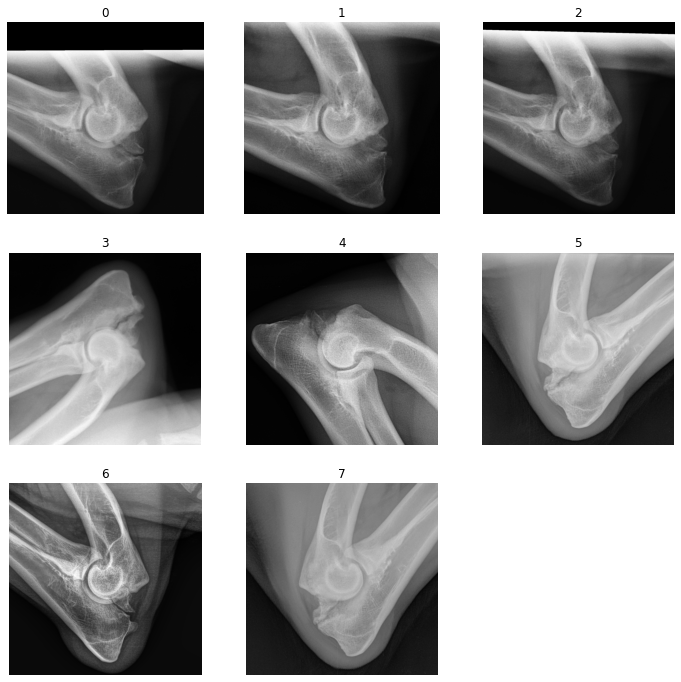

In [13]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [14]:
detection_df.to_csv(filename_clean, index=False)